# Отбор признаков

Зачем его делать:  
- повысить качество моделей машинного обучения;  
- уменьшить время обучения и снизить требуемые вычислительные мощности;  
- позволяет ослабить «проклятие размерности».

## Внутренние (встроенные)

- __Lasso и MultiTaskLasso__ - это линейные модели, для одной и нескольких регрессий с l1 - регуляризацией.  
![lasso](img/lasso.png)  
- __Ridge__ - гребневая регрессия с l2 - регуляризацией.  
![ridge](img/ridge.png)  
- __Elastic-Net__ - линейная регрессия с l1 и l2 регуляризацией одновременно.  
![elastic](img/elastic.png)  
- __Logistic regression__ - логистическая регрессия. Возможность выбора l1 и l2 регуляризации.  
![log_l1](img/log_l1.png)  
![log_l1](img/log_l2.png)  
- __ARD (Automatic Relevance Determination Regression, регрессия автоматического определения релевантности)__: модель использует байесовскую гребневую регрессию (Bayesian Ridge Regression). Она сильнее смещает веса коэффициентов в сторону нуля по сравнению, например, с методом наименьших квадратов.  
![ARD](img/ARD.png)  

In [200]:
from sklearn.datasets import load_wine
import pandas as pd
data, target = load_wine(return_X_y=True)
columns = ['Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine = pd.DataFrame(data, columns = columns)
df_wine['Class label'] = target
df_wine.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  Class label  
0                          3.92   1065.0            0  
1                          3.40   1050.0            0  
2                          3.17   1185.0            0  
3                          3.45   1480.0            0  
4                          2.93    735.0            0

In [201]:
from sklearn.model_selection import train_test_split
X, y = load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size= 0.3, random_state=42)

In [202]:
X.shape

(178, 13)

In [205]:
len(X_train)

124

In [207]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [214]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [215]:
lr.score(X_train_std, y_train)

0.9596774193548387

In [216]:
lr.score(X_test_std, y_test)

1.0

In [217]:
lr.intercept_

array([-0.37, -0.12, -0.76])

In [218]:
lr.coef_

array([[ 0.36,  0.  ,  0.  , -0.15,  0.  ,  0.  ,  0.65,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.16],
       [-0.74,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        -1.04,  0.  ,  0.  , -0.29],
       [ 0.  ,  0.04,  0.  ,  0.  ,  0.  ,  0.  , -0.62,  0.  ,  0.  ,
         0.52, -0.34, -0.57,  0.  ]])

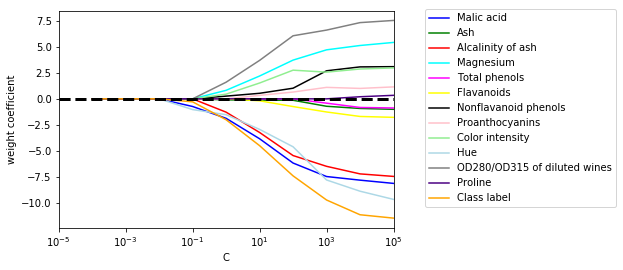

In [219]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [ ]:
# Напомнить про сжатие пространства путем снижения размерности методом главных компонент

## На основе важности признаков деревянных моделей

In [220]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=-1)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

In [226]:
df = pd.DataFrame(list(zip(importances, df_wine.columns)), columns=['importances', 'names'])

In [229]:
df.sort_values(by='importances', ascending=False)

importances                         names
9      0.179739               Color intensity
6      0.149082                    Flavanoids
12     0.138610                       Proline
11     0.129842  OD280/OD315 of diluted wines
0      0.121849                       Alcohol
10     0.071426                           Hue
5      0.059065                 Total phenols
3      0.037468             Alcalinity of ash
8      0.032331               Proanthocyanins
1      0.028980                    Malic acid
4      0.027504                     Magnesium
2      0.014386                           Ash
7      0.009719          Nonflavanoid phenols

## Обертки

Стратегии отбора:  
- __Прямой отбор (Forward selection)__: начинаем с пустого набора признаков, а затем итеративно добавляем признаки, обеспечивающие наилучший прирост качества моделей.  
- __Обратный отбор (Backward selection)__: начинаем с набора, состоящего из всех признаков, далее, на каждой итерации убираем «худший» признак.  
- __Sequential Forward Selection__: фиксируем небольшое число N, перебираем все комбинации по N признаков, выбираем лучшую комбинацию, потом перебираем комбинации из N+1 признаков так, что предыдущая лучшая комбинация признаков зафиксирована, а перебирается только новый признак.Таким образом можно перебирать, пока не упремся в максимально допустимое число признаков или пока качество модели не перестанет значимо расти. __Домашка!!!:__ Написать класс SFS (_init_(self, estimator, k_features)) с методами fit(X,y) и transform(X)
- __RFE (Recursive feature elimination, рекурсивное удаление признаков)__: «жадный» алгоритм поиска, который отбирает признаки с помощью рекурсивного определения всё более маленьких наборов признаков. Он ранжирует признаки по очерёдности их удаления.

In [230]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_train_std, y_train)

In [232]:
fit.n_features_

3

In [233]:
fit.support_

array([False, False, False, False, False, False,  True, False, False,
        True, False, False,  True])

In [234]:
fit.ranking_

array([ 2,  8,  5,  4, 10,  9,  1, 11,  7,  1,  3,  6,  1])

In [235]:
df = pd.DataFrame(list(zip(fit.ranking_, df_wine.columns)), columns=['importances', 'names'])
df.sort_values(by='importances', ascending=False)

importances                         names
7            11          Nonflavanoid phenols
4            10                     Magnesium
5             9                 Total phenols
1             8                    Malic acid
8             7               Proanthocyanins
11            6  OD280/OD315 of diluted wines
2             5                           Ash
3             4             Alcalinity of ash
10            3                           Hue
0             2                       Alcohol
6             1                    Flavanoids
9             1               Color intensity
12            1                       Proline

## Фильтры. Методы с учителем.

- __Relief__: Этот метод случайным образом выбирает из датасета образцы и обновляет значимость каждого признака на основе разницы между выбранным экземпляром и двумя ближайшими к нему объектами того же и противоположного классов. Если наблюдается разница в значениях признака для двух ближайших соседей одного класса, его важность снижается, а если, наоборот,  наблюдается различие между значениями признака для объектов разных классов, важность, соответственно, повышается.  
![relif](img/relif.png)


- __Критерий Фишера (Fisher score)__: Обычно используется в задачах бинарной классификации. Отношение Фишера (Fisher ratio, FiR) определяется как расстояние между средними значениями признаков для каждого класса, деленное на их дисперсии:
![fisher](img/fisher.png)

- __Критерий хи-квадрат (Chi-squared score)__: Проверяет, есть ли значимая разница между наблюдаемой и ожидаемой частотами двух категориальных переменных. Таким образом, проверяется нулевая гипотеза об отсутствии связи между двумя переменными.  
![chi](img/chi.png)  
_Чтобы корректно применять критерий хи-квадрат для проверки связи между разными признаками из датасета и целевой переменной, необходимо соблюсти условия: переменные должны быть категориальными, независимыми и  должны иметь ожидаемую частоту больше 5. Последнее условие гарантирует, что CDF (cumulative density function) статистического критерия (test statistic) может быть аппроксимирован с помощью распределения хи-квадрат._

- __CFS (Correlation-based feature selection, отбор признаков на основе корреляции)__. Хорошее подмножество признаков содержит такие признаки, которые высоко коррелируют с целевой переменной, и при этом не коррелируют друг с другом. Оценка подмножества из k признаков вычисляется так:  
![corr](img/corr.png)  
Здесь rcf — это среднее значение всех корреляций между признаком и классом, а rff — среднее значение всех корреляций между признаками. Критерий CFS определяется так:  
![cfs](img/cfs.png)  

- __FCBF (Fast correlation-based filter, быстрый фильтр на основе корреляции)__: Этот метод работает быстрее и эффективнее, чем ReliefF и CFS, и поэтому чаще используется для входных данных высокой размерности. По сути, этот типичный подход, учитывающий релевантность и избыточность, в рамках которого сначала для всех признаков вычисляются Symmetrical Uncertainty (взаимная информация между X и Y I(X, Y), деленная на сумму их энтропий), затем признаки сортируются по этому критерию, а потом удаляются избыточные.

In [237]:
from sklearn.feature_selection import SelectKBest, f_classif
print(X.shape)

fit = SelectKBest(f_classif, k=5).fit(X_train_std, y_train)

(178, 13)


In [239]:
fit.scores_

array([ 86.85,  28.13,   7.24,  26.74,   7.09,  64.41, 151.55,  13.67,
        28.63,  92.08,  61.88, 141.67, 123.66])

In [240]:
df = pd.DataFrame(list(zip(fit.scores_, df_wine.columns)), columns=['importances', 'names'])
df.sort_values(by='importances', ascending=False)

importances                         names
6    151.554456                    Flavanoids
11   141.667970  OD280/OD315 of diluted wines
12   123.656119                       Proline
9     92.079710               Color intensity
0     86.850901                       Alcohol
5     64.411613                 Total phenols
10    61.883701                           Hue
8     28.628544               Proanthocyanins
1     28.125969                    Malic acid
3     26.744705             Alcalinity of ash
7     13.673975          Nonflavanoid phenols
2      7.236742                           Ash
4      7.088389                     Magnesium

In [247]:
from sklearn.model_selection import cross_val_score
x_kbest = SelectKBest(f_classif, k=12).fit_transform(X_train_std, y_train)

In [243]:
cross_val_score(LogisticRegression(), X_train_std, y_train, scoring='neg_log_loss').mean()

-0.15150477996866887

In [248]:
cross_val_score(LogisticRegression(), x_kbest, y_train, scoring='neg_log_loss').mean()

-0.14416666721997953

# Фильтры. Методы без учителя.

- __Дисперсия__: было показано, что оценка дисперсии признака может быть эффективным способом отбора признаков. Как правило признаки с почти нулевой дисперсией не являются значимыми, и их можно удалить.

- Средняя абсолютная разность: Вычисляем среднюю абсолютную разность между значениями признака и его средним значением (реализация).
![mad](img/mad.png)  
Более высокие значения, как правило, имеют более высокую предсказательную силу.

- __Соотношение дисперсий__: Среднее арифметическое, деленное на среднее геометрическое. Более высокая дисперсия соответствует более релевантным признакам.  
![am](img/am.png) ![gm](img/gm.png) ![r](img/r.png)

- __Критерий Лапласа (Laplacian Score)__: В его основе лежит наблюдение, что данные из одного класса часто расположены ближе друг к другу, поэтому можно оценить важность признака по его способности отражать эту близость. Метод состоит из встраивания данных в граф ближайших соседей с помощью измерения произвольного расстояния с последующим вычислением матрицы весов. Затем для каждого признака вычисляем критерий Лапласа и получаем такое свойство, что наименьшие значения соответствуют самым важным размерностям. Однако на практике при отборе подмножества признаков обычно применяется другой алгоритм кластеризации (метод k-средних), с помощью которого выбирается самая эффективная группа. _(https://papers.nips.cc/paper/2909-laplacian-score-for-feature-selection.pdf)_

- __Критерий Лапласа в сочетании с энтропией на основе расстояния__: в основе алгоритма лежит критерий Лапласа, где кластеризация методом k-средних заменяется на энтропию. Алгоритм демонстрирует более высокую стабильность на датасетах высокой размерности

- __MCFS (Multi-Cluster Feature selection, многокластерный отбор признаков)__: для измерения корреляции между разными признаками выполняется спектральный анализ. Для кластеризации данных и оценки признаков используются собственные вектора  оператора Лапласа(graph Laplacian).  

<a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.295.8115&rep=rep1&type=pdf">Почитать об этом и других методах можно в Feature Selection for Clustering: A Review.</a>  
_Большая часть из рассмотренных методов реализована в https://github.com/danilkolikov/fsfc_ и в _https://github.com/jundongl/scikit-feature_

# Гибридные методы

Другой способ реализации отбора признаков представляет собой гибрид из фильтров и обёрток, объединённых в двухфазный процесс:   
- Признаки фильтруются по статистическим свойствам,
- Применяются методы обертки.

## Boruta

- Признаки конкурируют не друг с другом, а со своим рандомизированным двойником
- Делают это много раз. И оставляют признаки, которые не могли выстрелить случайно.

In [250]:
XB = df_wine.drop(columns='Class label')
X_shadow = XB.apply(np.random.permutation)

In [251]:
X_shadow.columns = ['shadow_' + i for i in XB.columns]

In [253]:
X_boruta = pd.concat([XB, X_shadow], axis=1)
X_boruta.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  \
0        3.06                  0.28             2.29             5.64   
1        2.76                  0.26             1.28             4.38   
2        3.24                  0.30             2.81             5.68   
3        3.49                  0.24             2.18             7.80   
4        2.69                  0.39             1.82             4.32   

        ...        shadow_Alcalinity of ash  shadow_Magnesium  \
0       ...                            20.5             112.0   
1       ...                            16.0              85.0   
2       ...                            16.0              88.0   
3       ...                            12.4              98.0   
4       ...                            16.8             123.0   

   shadow_Total phenols  shadow_Flavanoids  shadow_Nonflavanoid phenols  \
0                  1.35               2.53                         0.26   
1                  1.61               3.25                         0.40   
2                  2.60               3.93                         0.22   
3                  1.60               2.68                         0.43   
4                  1.65               1.58                         0.53   

   shadow_Proanthocyanins  shadow_Color intensity  shadow_Hue  \
0                    2.38                5.280000        0.57   
1                    0.84                2.500000        0.60   
2                    0.81                4.700000        0.88   
3                    1.43                3.170000        0.96   
4                    1.35                9.899999        0.79   

   shadow_OD280/OD315 of diluted wines  shadow_Proline  
0                                 3.30           920.0  
1                                 3.05           520.0  
2                                 2.74          1270.0  
3                                 1.71           720.0  
4                                 3.22           845.0  

[5 rows x 26 columns]

In [254]:
forest = RandomForestClassifier(max_depth=5, random_state=42)
forest.fit(X_boruta, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [255]:
feat_imp_X = forest.feature_importances_[:len(XB.columns)]
feat_imp_shadow = forest.feature_importances_[len(XB.columns):]

In [256]:
hits = feat_imp_X > feat_imp_shadow.max()

In [257]:
hits

array([ True,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True])

In [258]:
hits = np.zeros((len(XB.columns)))

In [259]:
for iter_ in range(20):
    np.random.seed(iter_)
    X_shadow = XB.apply(np.random.permutation)
    X_boruta = pd.concat([XB, X_shadow], axis=1)
    forest = RandomForestClassifier(max_depth=5, random_state=42)
    forest.fit(X_boruta, y)
    
    feat_imp_X = forest.feature_importances_[:len(XB.columns)]
    feat_imp_shadow = forest.feature_importances_[len(XB.columns):]
    hits += feat_imp_X > feat_imp_shadow.max()

In [260]:
hits

array([20., 19.,  0.,  1., 13., 20., 20.,  0.,  3., 20., 20., 20., 20.])

In [181]:
from boruta_py import BorutaPy

In [182]:
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100
)

In [183]:
boruta.fit(np.array(XB), np.array(y))

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=None,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x00000246CB02AF30>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x00000246CB02AF30>,
     two_step=True, verbose=0)

In [195]:
green_area = list(XB.columns[boruta.support_])
blue_area = list(XB.columns[boruta.support_weak_])
print('features in the green area:', green_area)
print()
print('features in the blue area:', blue_area)

features in the green area: ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

features in the blue area: []


# Домашка (дедлайн 09.11.2020)

Реализовать класс с алгоритмом Sequential Forward Selection, который на вход будет принимать модель и количество фичей (estimator, k_features) и иметь методы fit(X,y) и transform(X).

1. Фиксируем небольшое число признаков N.
2. Перебираем все комбинации по N признаков, выбираем лучшую комбинацию.
3. Перебираем комбинации из N+1 признаков так, что предыдущая лучшая комбинация признаков зафиксирована, а перебирается только новый признак.
4. Таким образом перебираем, пока не упремся в максимально допустимое число признаков (k_features) или пока качество модели не перестанет значимо расти.